# Data Analysis on Cereal Nutritional Facts

# Linear Regression

In [2]:
# place any needed import statements at the top
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from collections import Counter
from typing import List

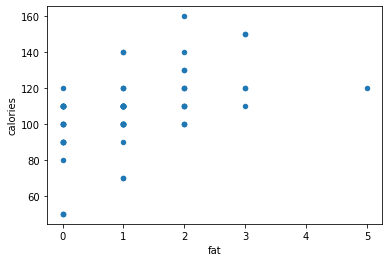

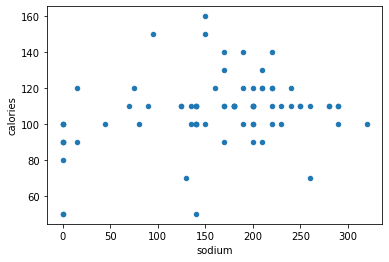

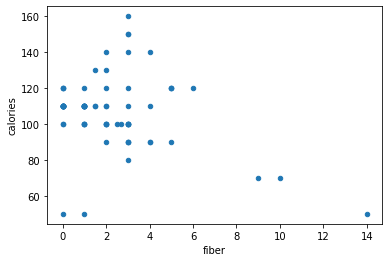

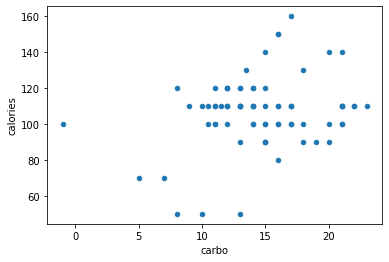

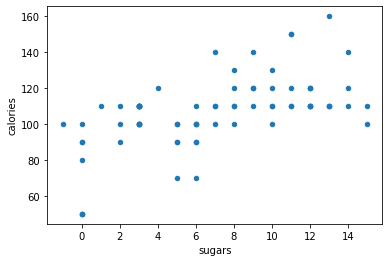

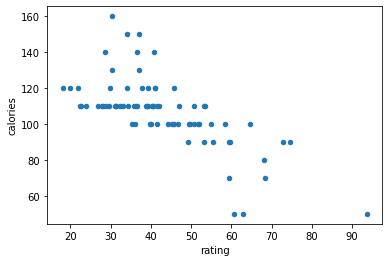

In [3]:
df = pd.read_csv("cereal.csv")

df.plot(x='fat', y = 'calories', kind='scatter')
plt.show()
df.plot(x='sodium', y = 'calories', kind='scatter')
plt.show()
df.plot(x='fiber', y = 'calories', kind='scatter')
plt.show()
df.plot(x='carbo', y = 'calories', kind='scatter')
plt.show()
df.plot(x='sugars', y = 'calories', kind='scatter')
plt.show()
df.plot(x='rating', y = 'calories', kind='scatter')
plt.show()

In [5]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
df.std()

C:\Users\Brent\AppData\Local\Temp\ipykernel_15724\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


calories    19.484119
protein      1.094790
fat          1.006473
sodium      83.832295
fiber        2.383364
carbo        4.278956
sugars       4.444885
potass      71.286813
vitamins    22.342523
shelf        0.832524
weight       0.150477
cups         0.232716
rating      14.047289
dtype: float64

In [9]:
df.min()

name        100% Bran
mfr                 A
type                C
calories           50
protein             1
fat                 0
sodium              0
fiber             0.0
carbo            -1.0
sugars             -1
potass             -1
vitamins            0
shelf               1
weight            0.5
cups             0.25
rating      18.042851
dtype: object

In [7]:
df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


In [10]:
df.max()

name        Wheaties Honey Gold
mfr                           R
type                          H
calories                    160
protein                       6
fat                           5
sodium                      320
fiber                      14.0
carbo                      23.0
sugars                       15
potass                      330
vitamins                    100
shelf                         3
weight                      1.5
cups                        1.5
rating                93.704912
dtype: object

In [7]:
df.groupby('mfr').mean()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,
A,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,2.000000,1.000000,1.000000,54.850917
G,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,2.136364,1.049091,0.875000,34.485852
K,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,2.347826,1.077826,0.796087,44.038462
N,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.666667,8.333333,1.666667,0.971667,0.778333,67.968567
P,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,2.444444,1.064444,0.714444,41.705744
Q,95.000000,2.625000,1.750000,92.500000,1.337500,10.000000,5.250000,74.375000,12.500000,2.375000,0.875000,0.823750,42.915990
R,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,89.250000,25.000000,2.000000,1.000000,0.871250,41.542997


In [12]:
df.groupby('mfr').min()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
A,Maypo,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917
G,Apple Cinnamon Cheerios,C,100,1,1,140,0.0,10.5,1,25,25,1,1.00,0.50,19.823573
K,All-Bran,C,50,1,0,0,0.0,7.0,0,20,25,1,1.00,0.33,29.924285
N,100% Bran,C,70,2,0,0,1.0,5.0,0,-1,0,1,0.83,0.33,59.363993
P,Bran Flakes,C,90,1,0,45,0.0,11.0,3,25,25,1,1.00,0.25,28.025765
Q,100% Natural Bran,C,50,1,0,0,0.0,-1.0,-1,15,0,1,0.50,0.50,18.042851
R,Almond Delight,C,90,1,0,95,0.0,14.0,2,-1,25,1,1.00,0.67,34.139765


In [13]:
df.groupby('mfr').max()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
A,Maypo,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917
G,Wheaties Honey Gold,C,140,6,3,290,4.0,21.0,14,230,100,3,1.50,1.50,51.592193
K,Special K,C,160,6,3,320,14.0,22.0,15,330,100,3,1.50,1.00,93.704912
N,Strawberry Fruit Wheats,H,100,4,1,130,10.0,21.0,6,280,25,3,1.00,1.00,74.472949
P,Post Nat. Raisin Bran,C,120,3,3,210,6.0,17.0,15,260,25,3,1.33,1.33,53.371007
Q,Quaker Oatmeal,H,120,5,5,220,2.7,14.0,12,135,25,3,1.00,1.00,63.005645
R,Wheat Chex,C,150,4,3,280,4.0,23.0,11,170,25,3,1.00,1.13,49.787445


In [14]:
df.groupby('mfr').std()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,10.371873,1.129111,0.581087,44.021345,1.241421,3.347804,3.872704,45.682060,26.343756,0.833550,0.132446,0.240906,8.946704
K,22.218818,1.070628,0.838783,84.132988,3.193991,4.465060,4.500768,91.982448,25.826267,0.775107,0.154830,0.209778,14.457434
N,10.327956,0.752773,0.408248,54.931776,3.098387,5.865151,2.857738,91.829552,12.909944,0.816497,0.069402,0.272721,5.509326
P,10.540926,0.881917,1.054093,55.157602,2.333333,1.922094,4.576510,83.470720,0.000000,0.881917,0.129433,0.317101,10.047647
Q,29.277002,1.597990,1.581139,99.498744,0.998481,4.810702,5.092011,43.378525,13.363062,0.744024,0.231455,0.200637,16.797673
R,22.677868,1.069045,1.281740,56.690734,1.552648,3.248626,3.563205,66.387929,0.000000,1.069045,0.000000,0.180114,6.080841


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(np.c_[df['protein'], df['fat'], df['sodium'], df['fiber'], df['carbo'], df['sugars'], df['potass'], df['vitamins']])
y = pd.DataFrame(np.c_[df['calories']])
X_train, X_test, y_train, y_test = train_test_split(X, y)

regr = LinearRegression()
model = regr.fit(X_train, y_train)
pred = regr.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(y_train, pred)))
train_r2 = r2_score(y_train, pred)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print()
print("Training set RMSE: ") 
print(train_rmse)
print("Training set R2: ") 
print(train_r2)

Intercept: [-6.03351357]
Coefficients: [[ 5.51739213e+00  9.18948880e+00 -2.65150530e-03  1.18583700e+00
   4.29989004e+00  4.29776558e+00 -4.73631157e-02 -3.24431660e-02]]

Training set RMSE: 
4.611186271198487
Training set R2: 
0.9324695863624997


In [25]:
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

test_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_r2 = r2_score(y_test, pred)

print("Testing set RMSE: ") 
print(test_rmse)
print("Testing set R2: ") 
print(test_r2)

Intercept: [30.1490551]
Coefficients: [[ 5.82242905e+00  8.07825786e+00 -4.79832184e-03 -2.18168055e+00
   2.48490038e+00  2.92545010e+00  2.25093588e-02  3.62670557e-02]]

Testing set RMSE: 
7.282577159027255
Testing set R2: 
0.8751361269518882


# Logistic Regression

In [8]:
import pandas as pd

cerealdata = pd.read_csv("cereal.csv")

In [9]:
cerealdata.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
X = cerealdata[['fiber']]
y = cerealdata['type']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
logreg = LogisticRegression(solver  = 'liblinear', random_state = 0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
y_predict_train = logreg.predict(X_train)
print("LogisticRegression Accuracy %.6f" %metrics.accuracy_score(y_train, y_predict_train))

LogisticRegression Accuracy 0.967213


In [14]:
y_predict_test = logreg.predict(X_test)
print("LogisticRegression Accuracy %.6f" %metrics.accuracy_score(y_test, y_predict_test))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

LogisticRegression Accuracy 0.937500
Confusion matrix

 [[15  0]
 [ 1  0]]

True Positives(TP) =  15

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  1


In [15]:
X = cerealdata[['calories']]
y = cerealdata['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

logregtwo = LogisticRegression(solver = 'liblinear', random_state = 0)
logregtwo.fit(X_train, y_train)

y_predict_train = logregtwo.predict(X_train)
print("LogisticRegression Accuracy %.6f" %metrics.accuracy_score(y_train, y_predict_train))
y_predict_test = logregtwo.predict(X_test)
print("LogisticRegression Accuracy %.6f" %metrics.accuracy_score(y_test, y_predict_test))

LogisticRegression Accuracy 0.967213
LogisticRegression Accuracy 0.937500


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_predict_train)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[59  0]
 [ 2  0]]

True Positives(TP) =  59

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  2
